In [1]:
#%matplotlib notebook
import sys
import os
#messi
# Standard modules used through the notebook 
import numpy as np
import matplotlib.pyplot as plt

# Tools specific for this tutorial
# They are in the .py files accompaining this notebook    

from IS18 import vistools    
from IS18 import utils          
from IS18 import rectification  
from IS18 import stereo                 
from IS18 import triangulation

import srtm4
import s2p
import rpcm
import pickle
from PIL import Image

from bundle_adjust import ba_timeseries
from bundle_adjust import ba_utils   

# Display and interface settings (just for the notebook interface)
%load_ext autoreload
%autoreload 2
np.set_printoptions(linewidth=150)

### Set experiment

In [2]:
#GLOBAL VARIABLES
ALL_PIPELINE = True
CHECK_TRIANGULATION_DISTANCE = True
SAVE_SIFT_CLOUDS = True
print('Global variables defined')

# select site and order of input pairs
site = 'IARPA' # IARPA, JAX_113, JAX_161, JAX_251
order = 'heuristic' # oracle, heuristic, sift

exp_name = site+'_ba_rotations_'+order
input_dir = os.path.join('exp/',exp_name)
print('All files will be saved in "'+ input_dir + '"')
os.makedirs(input_dir, exist_ok=True)

Global variables defined
All files will be saved in "exp/IARPA_ba_rotations_heuristic"


### Load data

Found 47 images
Number of images to be used: 47
Finished loading RPC coefficients
Finished cropping the AOI in each image



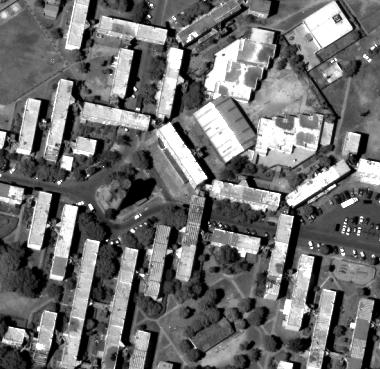
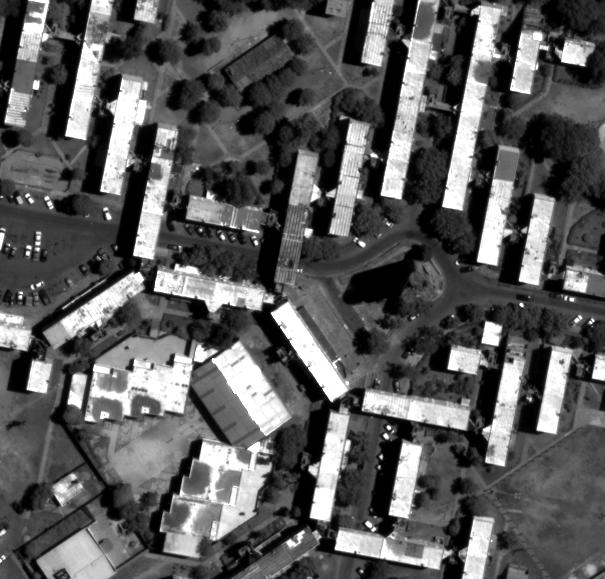
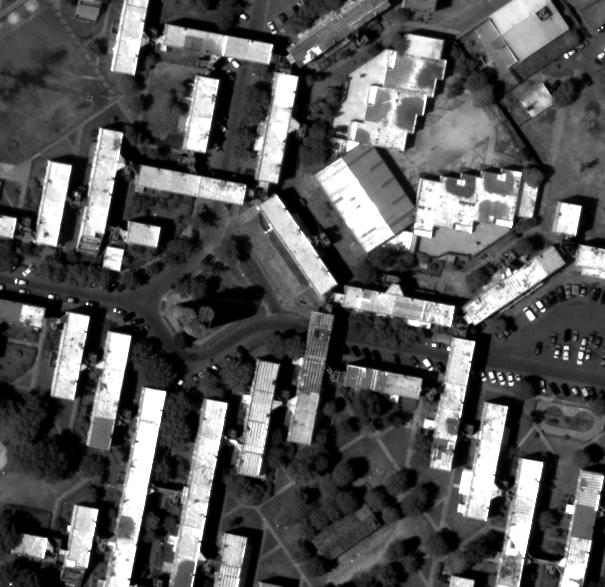
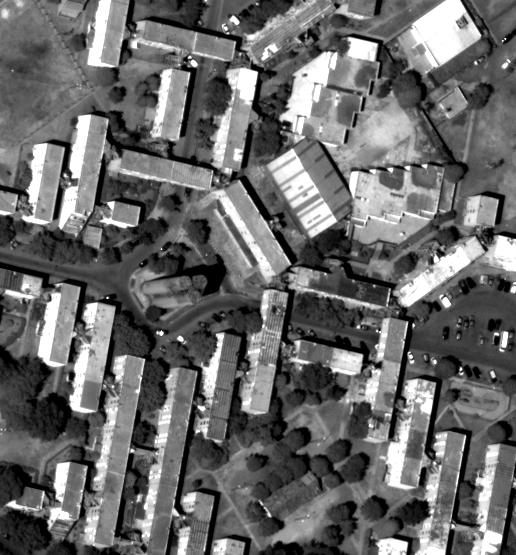
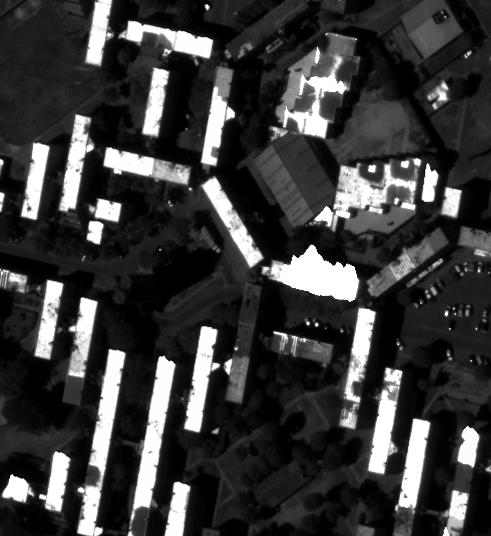
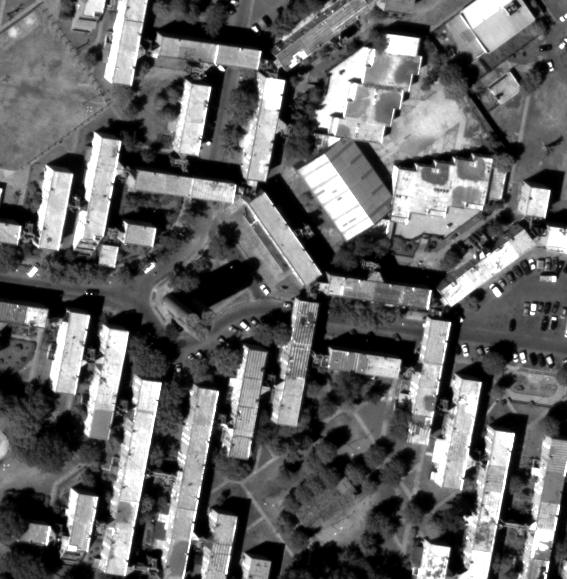
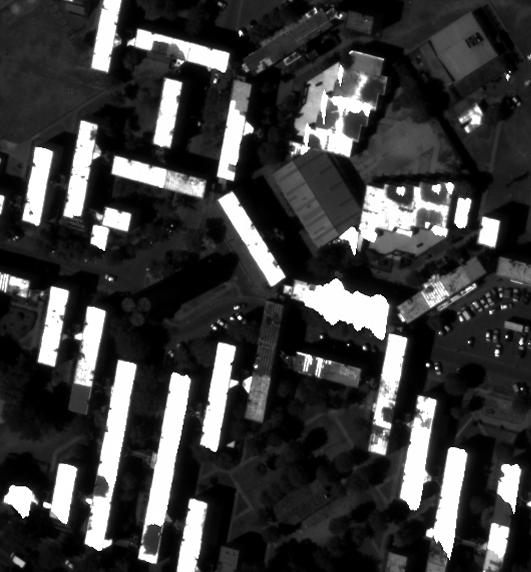
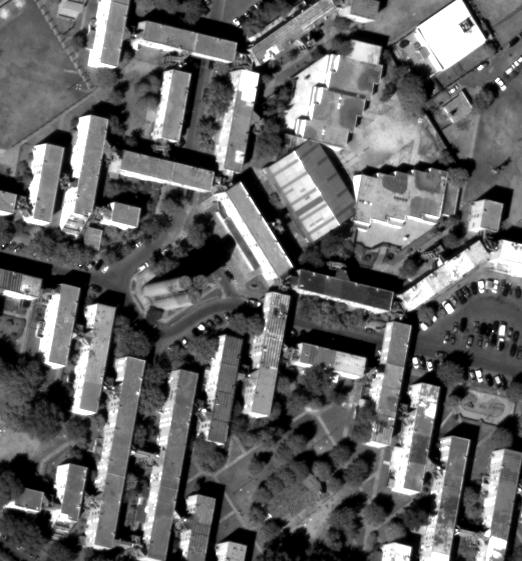
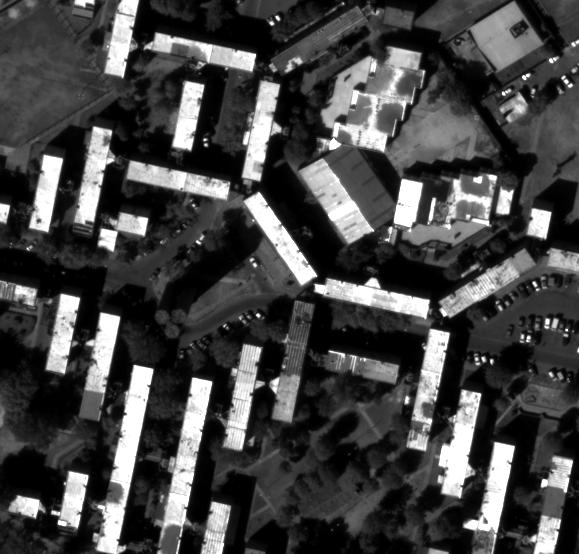
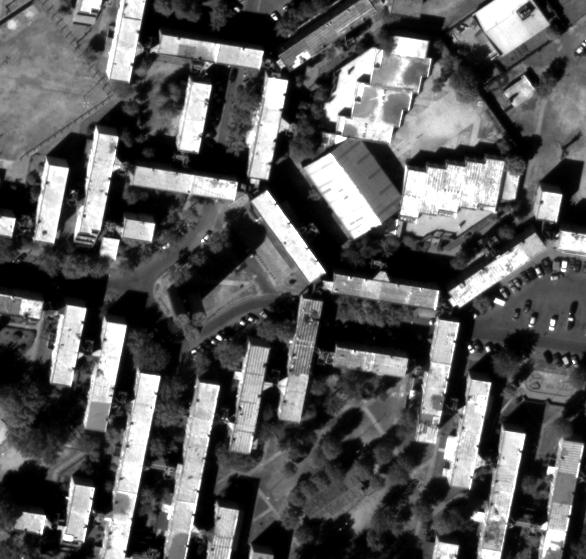
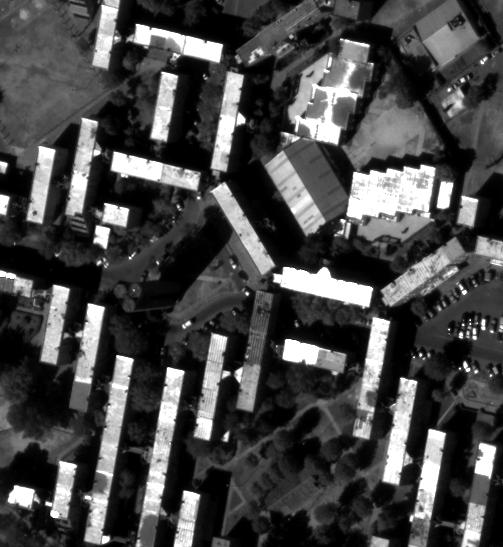
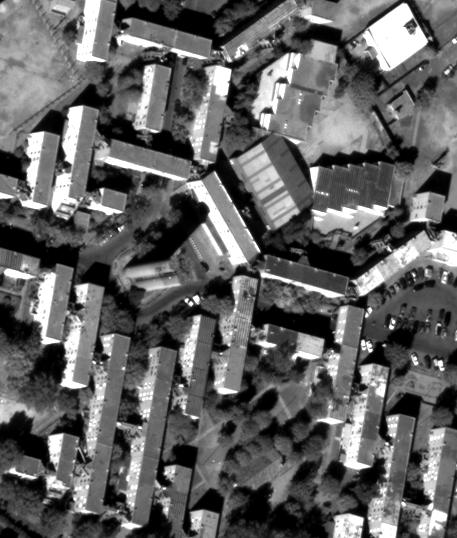
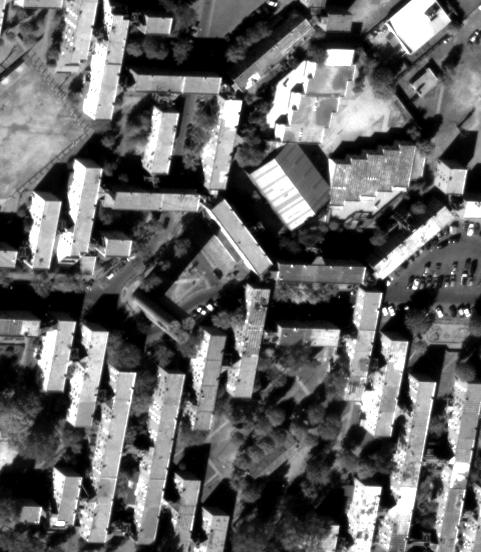
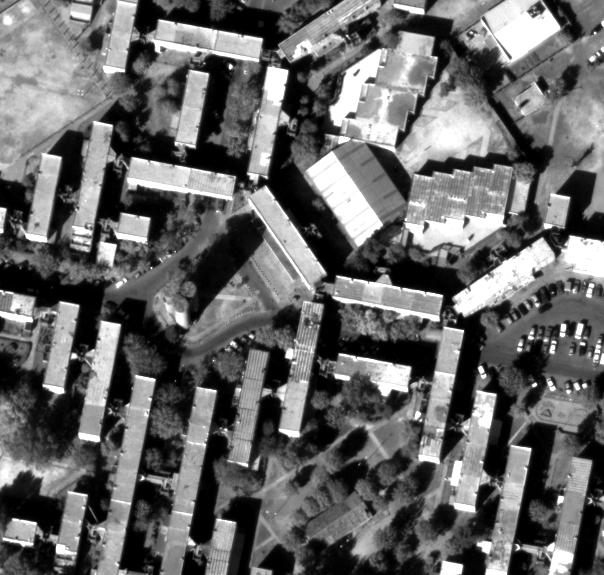
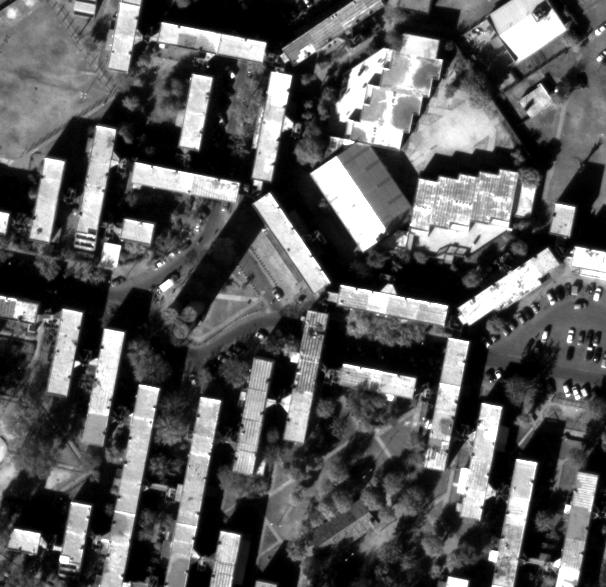
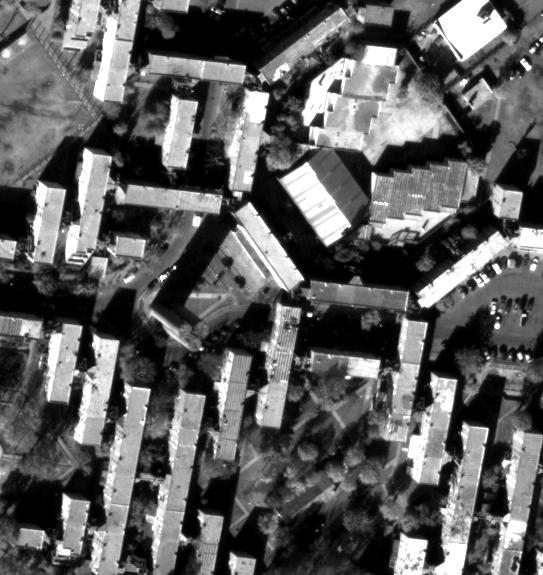
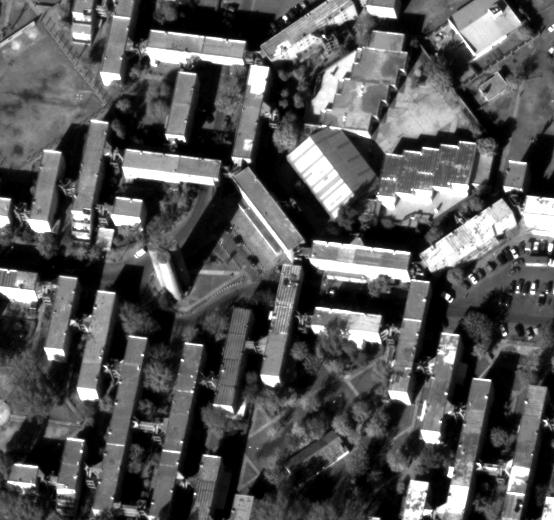
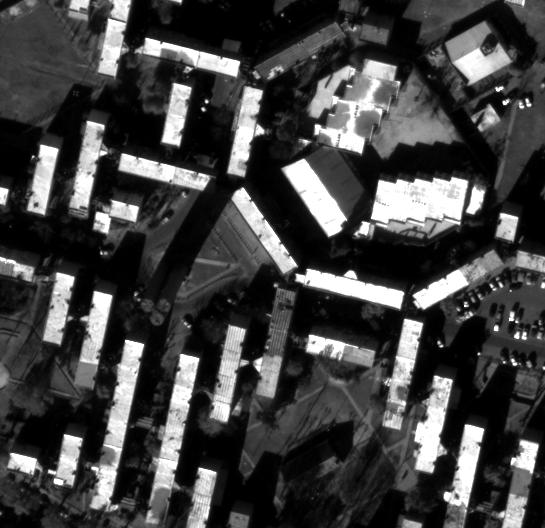
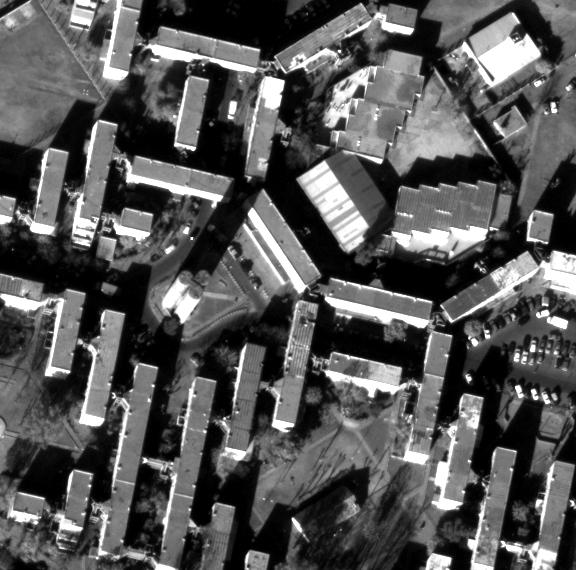
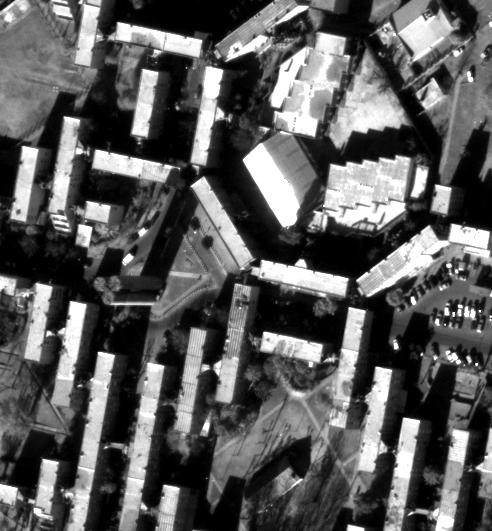
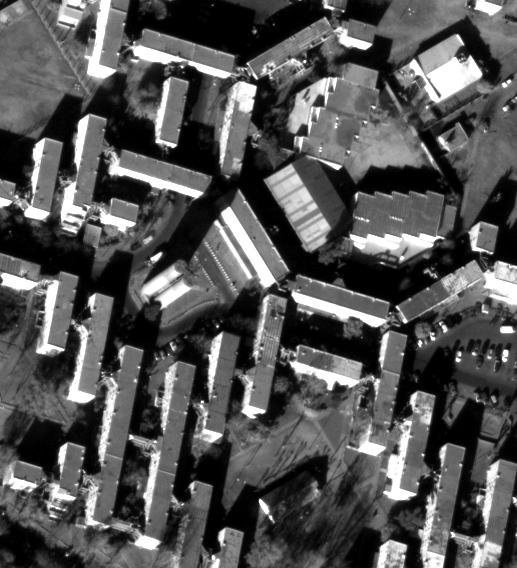
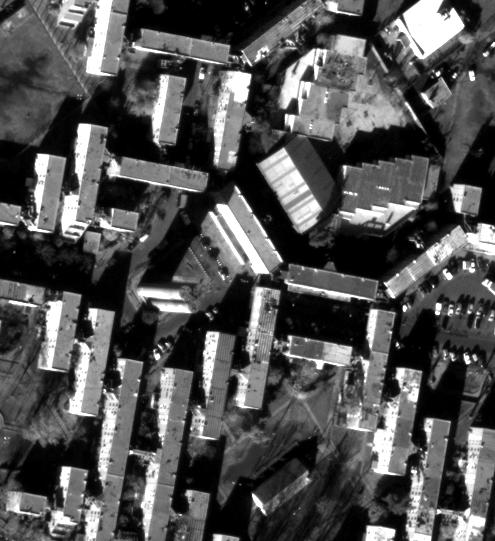
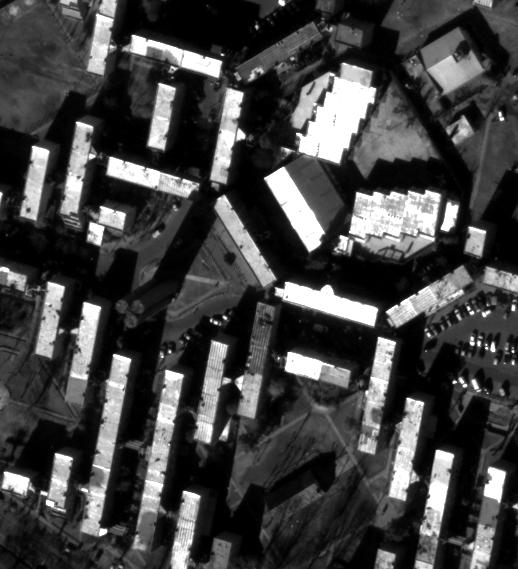
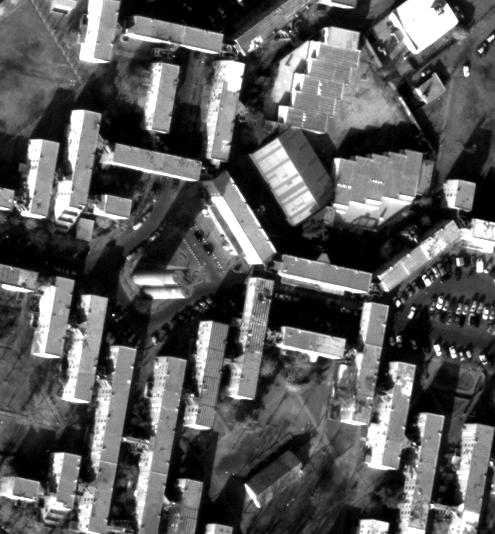
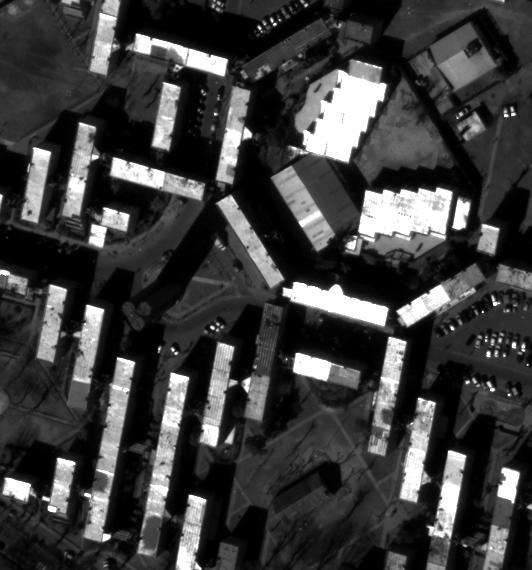
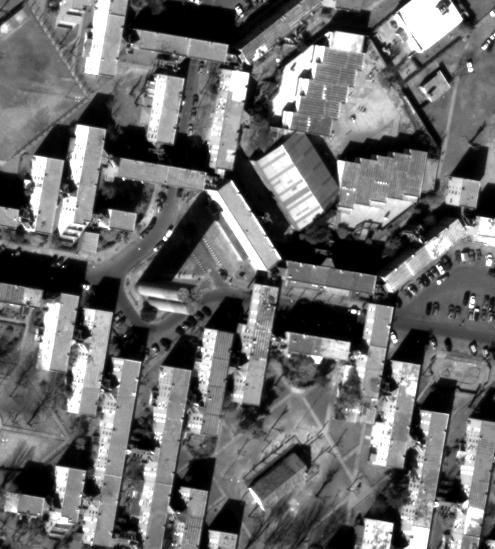
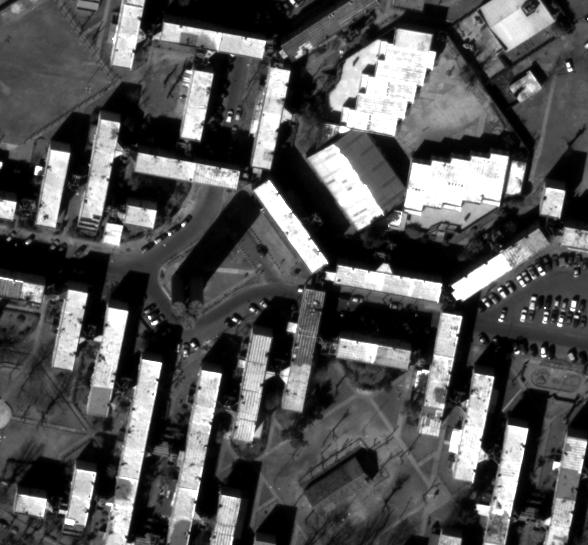
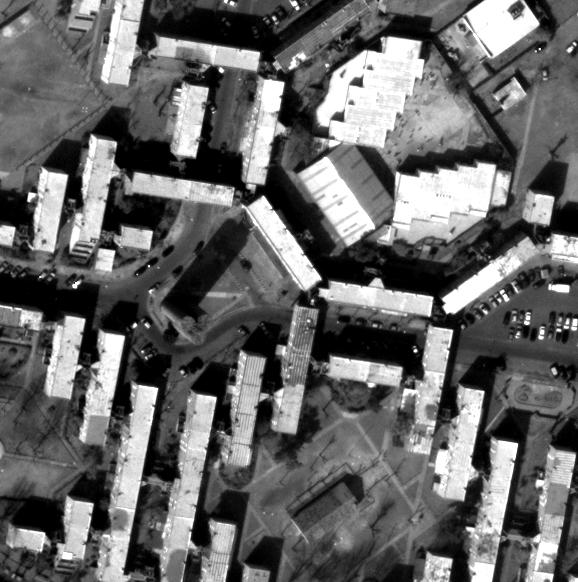
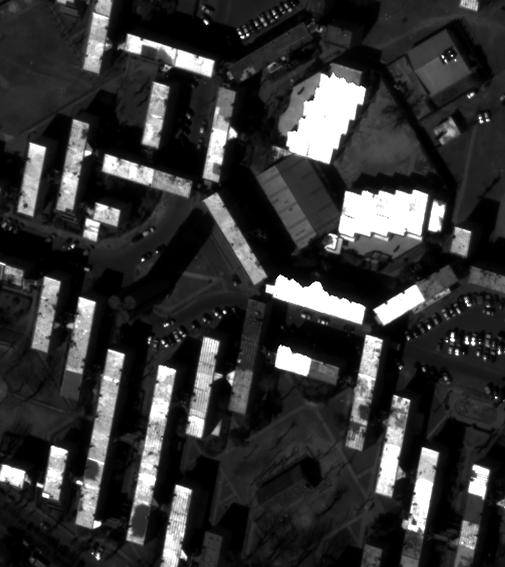
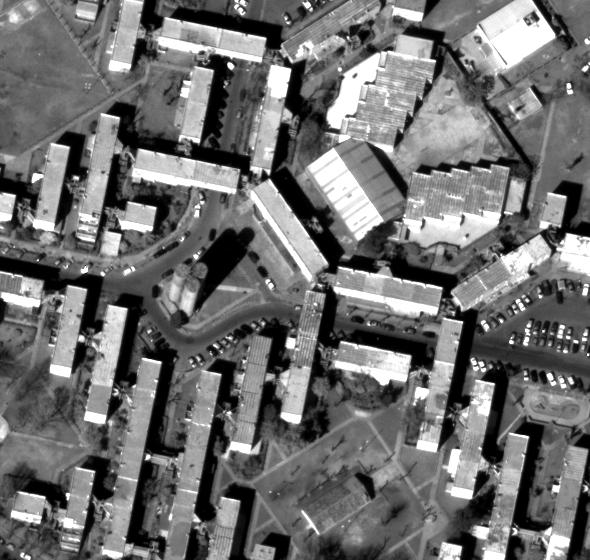
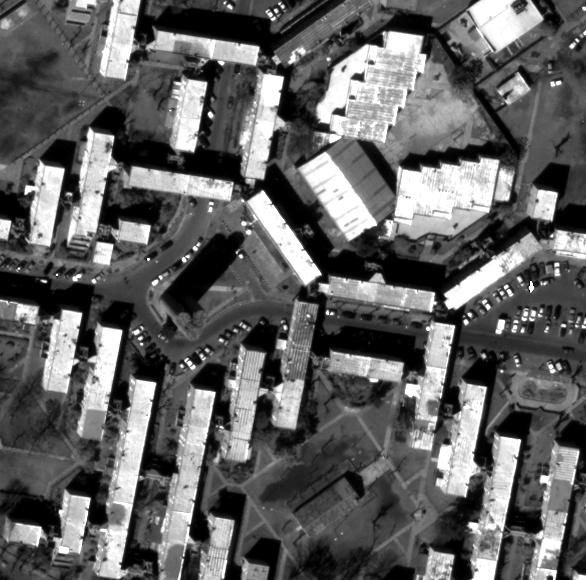
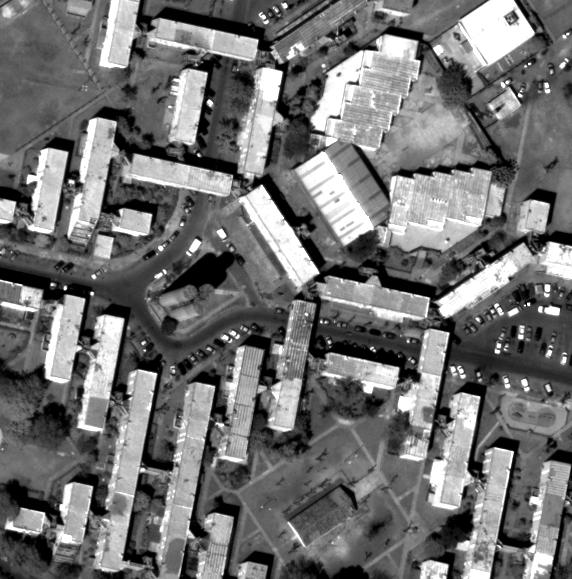
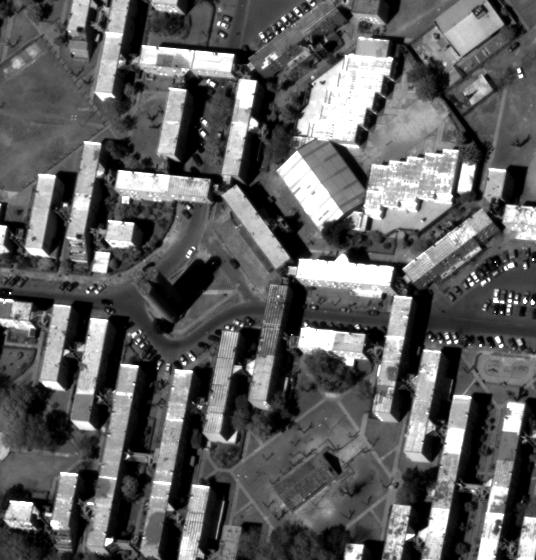
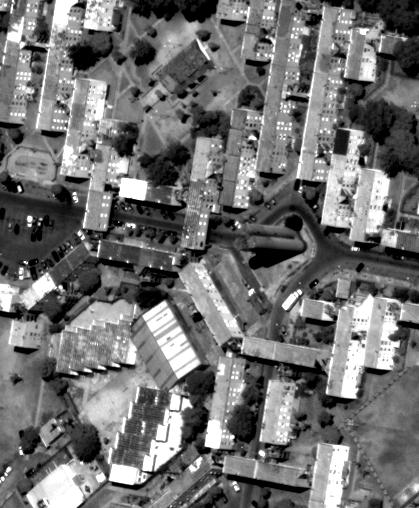
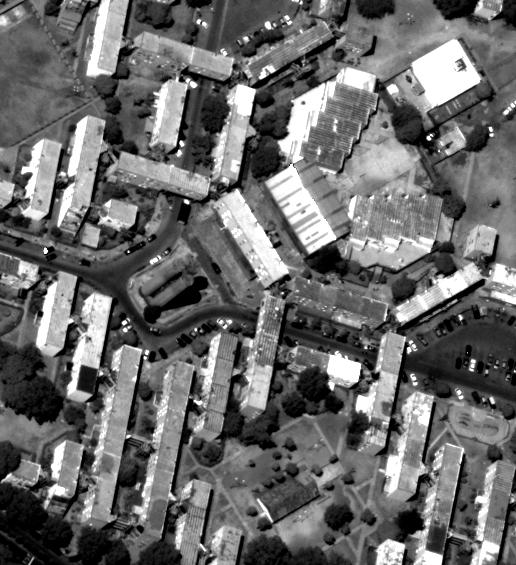
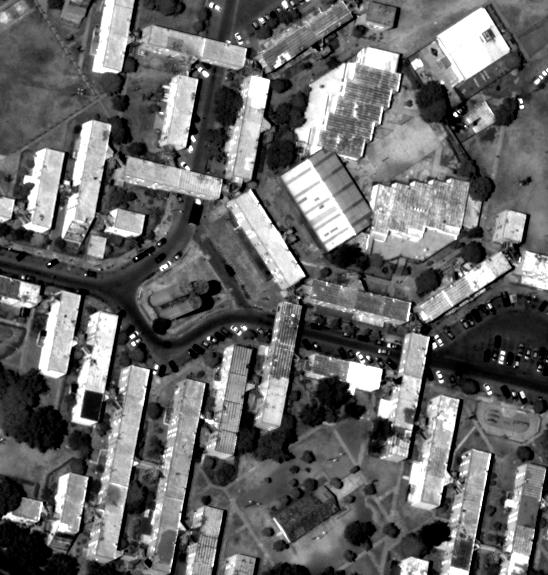
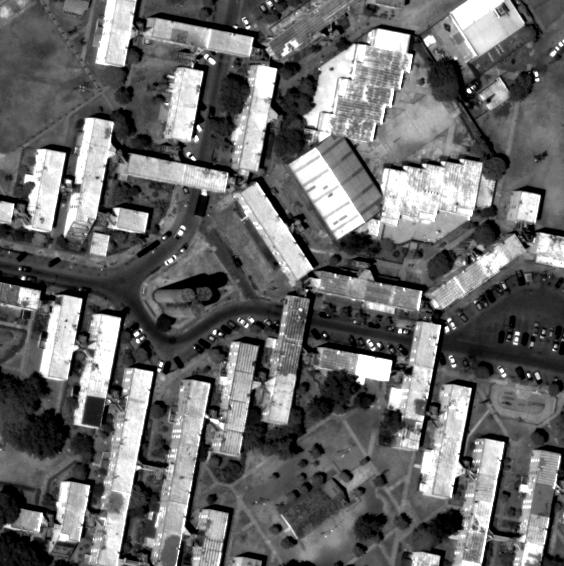
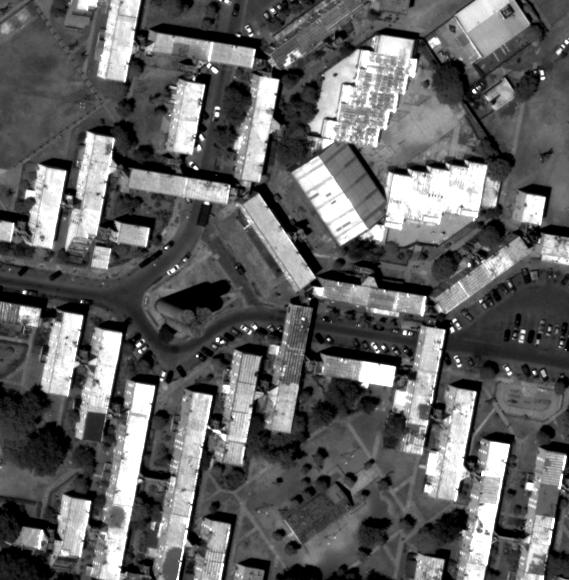
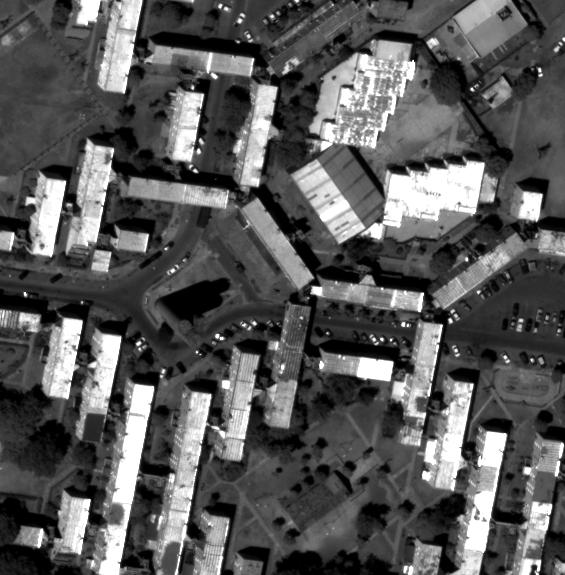
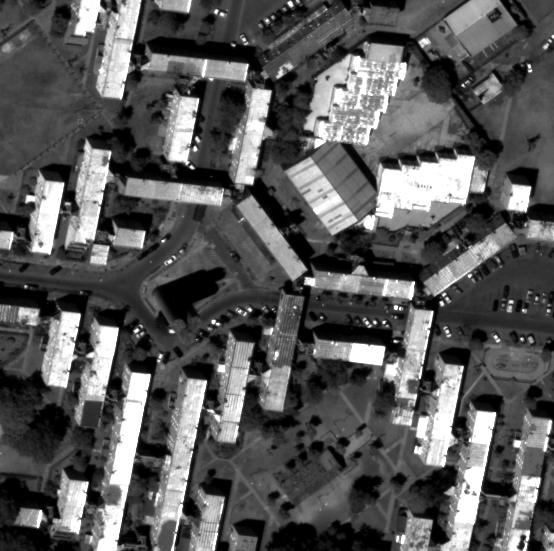
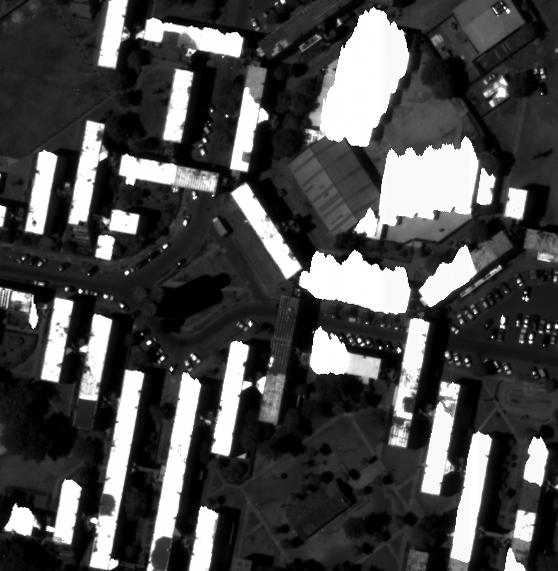
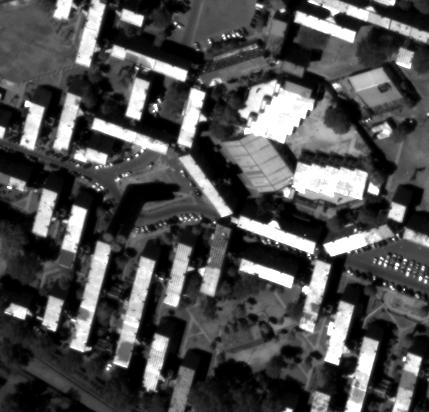
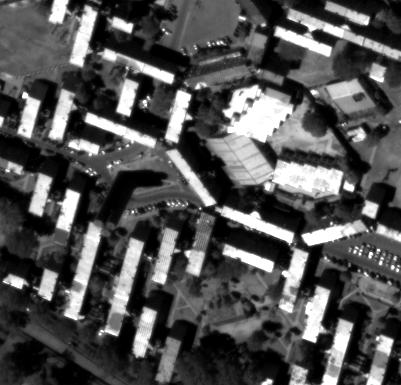
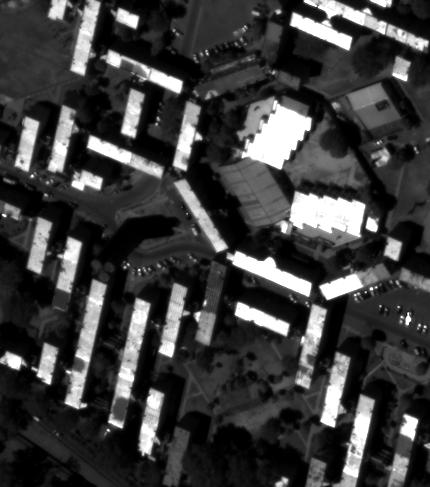
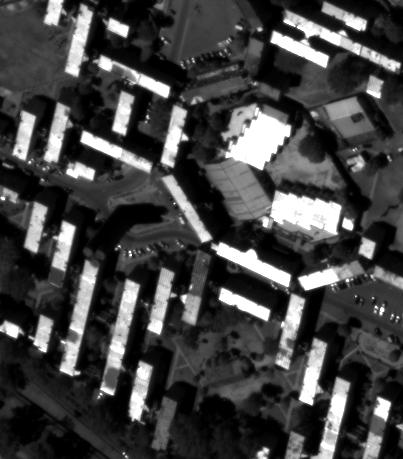
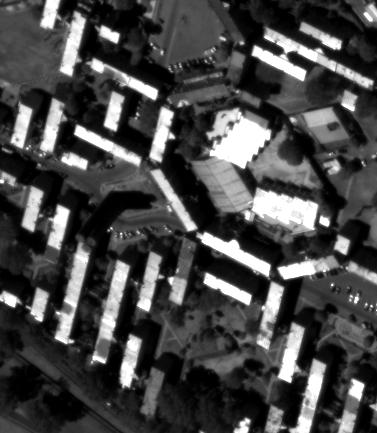
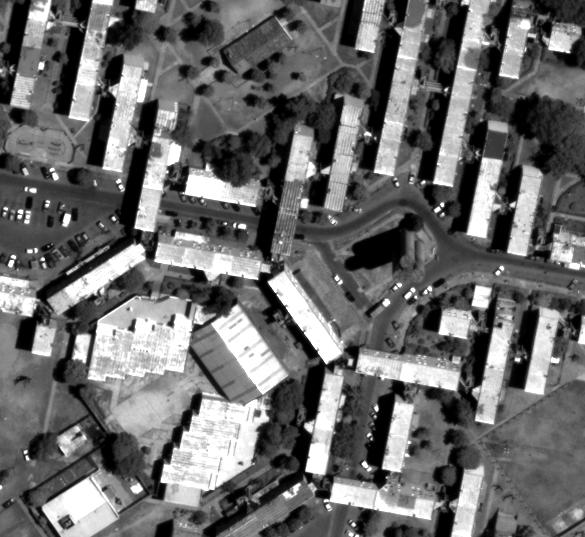

Crops were saved at data/ICCV19_IARPA


In [3]:
if site == 'IARPA':   
    # list the tiff images available in the remote folder
    IARPAurl = 'http://138.231.80.166:2332/iarpa-2016/cloud_optimized_geotif/'
    myimages = utils.listFD(IARPAurl, 'TIF')

    # sort the images by acquisition date
    myimages = sorted(myimages, key=utils.acquisition_date)
    myimages.pop(11)
    myimages.pop(13)
    myimages.pop(19)
    print('Found {} images'.format(len(myimages)))
    
    # set the coordinates of the area of interest as a GeoJSON polygon (Buenos aires AOI)
    aoi = {'coordinates': [[[-58.585185, -34.490883], [-58.585185, -34.48922 ], [-58.583104, -34.48922 ],
                            [-58.583104, -34.490883], [-58.585185, -34.490883]]], 'type': 'Polygon'}
    aoi['center'] = np.mean(aoi['coordinates'][0][:4], axis=0).tolist() # add center field
    
elif site in ['JAX_113', 'JAX_161', 'JAX_251']:   
    # list the tiff images available in the remote folder
    myimages = utils.listFD('http://138.231.80.166:2332/core3d/Jacksonville/WV3/PAN/', '.NTF.tif')

    # list the tiff images available in the remote folder
    mygts = utils.listFD('http://138.231.80.166:2332/grss-2019/track_3/Track3-Truth-geolocated/', '_DSM.tif')
    mygt_fn = [i for i in mygts if site in i]
    aoi = utils.get_image_longlat_polygon(mygt_fn[0])
    aoi['center'] = np.mean(aoi['coordinates'][0][:4], axis=0).tolist() # add center field
    
else: 
    print('input site is not valid!')
    
# select the number of cameras for the current run
n_cam = len(myimages)
print('Number of images to be used:', n_cam)

# load RPC coefficients
myrpcs = [rpcm.rpc_from_geotiff(x) for x in myimages]
print('Finished loading RPC coefficients')

# load image crops
mycrops = ba_utils.get_image_crops_from_aoi(myimages, aoi, display=True, \
                                            save_crops=True, output_dir='data/ICCV19_{}'.format(site))

### Set bundle adjustment input and load pipeline

In [4]:
ba_input_data = {}
ba_input_data['input_dir'] = input_dir
ba_input_data['n_adj'] = 0
ba_input_data['n_new'] = len(myimages)
ba_input_data['image_fnames'] = myimages
ba_input_data['crops'] = mycrops
ba_input_data['rpcs'] = myrpcs
ba_input_data['cam_model'] = 'Perspective'
ba_input_data['masks'] = None
ba_input_data['aoi'] = aoi

print('ba_input_data set!')

from bundle_adjust.ba_pipeline import BundleAdjustmentPipeline

# run bundle adjustmenst
ba_pipeline = BundleAdjustmentPipeline(ba_input_data,
                                       tracks_config=None,
                                       display_plots=True)
ba_pipeline.display_aoi()

ba_input_data set!


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

### Run bundle adjustment

Approximating RPCs as Perspective projection matrices
47 projection matrices / 47 (0 err)
Done!

Building feature tracks - satellite scenario - using opencv SIFT

Parameters:
      use_masks:    False
      matching_thr: 0.6



Running feature detection...

Found 2181 keypoints in image 0
Found 3000 keypoints in image 1
Found 3000 keypoints in image 2
Found 3000 keypoints in image 3
Found 1294 keypoints in image 4
Found 3000 keypoints in image 5
Found 1509 keypoints in image 6
Found 3000 keypoints in image 7
Found 2421 keypoints in image 8
Found 3000 keypoints in image 9
Found 2290 keypoints in image 10
Found 3000 keypoints in image 11
Found 3000 keypoints in image 12
Found 3000 keypoints in image 13
Found 3000 keypoints in image 14
Found 3000 keypoints in image 15
Found 3000 keypoints in image 16
Found 2220 keypoints in image 17
Found 3000 keypoints in image 18
Found 2901 keypoints in image 19
Found 3000 keypoints in image 20
Found 3000 keypoints in image 21
Found 2350 keypoints in im

Pair (5,33) -> 8 matches
Pair (5,34) -> 0 matches
Pair (5,35) -> 9 matches
Pair (5,36) -> 48 matches
Pair (5,37) -> 68 matches
Pair (5,38) -> 82 matches
Pair (5,39) -> 56 matches
Pair (5,40) -> 0 matches
Pair (5,41) -> 0 matches
Pair (5,42) -> 0 matches
Pair (5,43) -> 0 matches
Pair (5,44) -> 0 matches
Pair (5,45) -> 0 matches
Pair (5,46) -> 8 matches
Pair (6,7) -> 0 matches
Pair (6,8) -> 69 matches
Pair (6,9) -> 13 matches
Pair (6,10) -> 70 matches
Pair (6,11) -> 0 matches
Pair (6,12) -> 8 matches
Pair (6,13) -> 0 matches
Pair (6,14) -> 8 matches
Pair (6,15) -> 0 matches
Pair (6,16) -> 0 matches
Pair (6,17) -> 24 matches
Pair (6,18) -> 0 matches
Pair (6,19) -> 8 matches
Pair (6,20) -> 7 matches
Pair (6,21) -> 7 matches
Pair (6,22) -> 28 matches
Pair (6,23) -> 0 matches
Pair (6,24) -> 59 matches
Pair (6,25) -> 0 matches
Pair (6,26) -> 11 matches
Pair (6,27) -> 8 matches
Pair (6,28) -> 67 matches
Pair (6,29) -> 0 matches
Pair (6,30) -> 9 matches
Pair (6,31) -> 8 matches
Pair (6,32) -> 0

Pair (14,27) -> 47 matches
Pair (14,28) -> 7 matches
Pair (14,29) -> 34 matches
Pair (14,30) -> 26 matches
Pair (14,31) -> 14 matches
Pair (14,32) -> 22 matches
Pair (14,33) -> 0 matches
Pair (14,34) -> 7 matches
Pair (14,35) -> 0 matches
Pair (14,36) -> 0 matches
Pair (14,37) -> 0 matches
Pair (14,38) -> 0 matches
Pair (14,39) -> 0 matches
Pair (14,40) -> 8 matches
Pair (14,41) -> 7 matches
Pair (14,42) -> 7 matches
Pair (14,43) -> 8 matches
Pair (14,44) -> 7 matches
Pair (14,45) -> 0 matches
Pair (14,46) -> 22 matches
Pair (15,16) -> 36 matches
Pair (15,17) -> 0 matches
Pair (15,18) -> 17 matches
Pair (15,19) -> 7 matches
Pair (15,20) -> 9 matches
Pair (15,21) -> 35 matches
Pair (15,22) -> 0 matches
Pair (15,23) -> 41 matches
Pair (15,24) -> 0 matches
Pair (15,25) -> 34 matches
Pair (15,26) -> 8 matches
Pair (15,27) -> 39 matches
Pair (15,28) -> 0 matches
Pair (15,29) -> 10 matches
Pair (15,30) -> 16 matches
Pair (15,31) -> 9 matches
Pair (15,32) -> 0 matches
Pair (15,33) -> 0 matche

Pair (26,35) -> 0 matches
Pair (26,36) -> 8 matches
Pair (26,37) -> 24 matches
Pair (26,38) -> 23 matches
Pair (26,39) -> 21 matches
Pair (26,40) -> 15 matches
Pair (26,41) -> 9 matches
Pair (26,42) -> 8 matches
Pair (26,43) -> 8 matches
Pair (26,44) -> 8 matches
Pair (26,45) -> 7 matches
Pair (26,46) -> 15 matches
Pair (27,28) -> 8 matches
Pair (27,29) -> 25 matches
Pair (27,30) -> 474 matches
Pair (27,31) -> 78 matches
Pair (27,32) -> 21 matches
Pair (27,33) -> 0 matches
Pair (27,34) -> 7 matches
Pair (27,35) -> 8 matches
Pair (27,36) -> 20 matches
Pair (27,37) -> 63 matches
Pair (27,38) -> 55 matches
Pair (27,39) -> 63 matches
Pair (27,40) -> 0 matches
Pair (27,41) -> 0 matches
Pair (27,42) -> 0 matches
Pair (27,43) -> 0 matches
Pair (27,44) -> 0 matches
Pair (27,45) -> 0 matches
Pair (27,46) -> 23 matches
Pair (28,29) -> 0 matches
Pair (28,30) -> 7 matches
Pair (28,31) -> 0 matches
Pair (28,32) -> 0 matches
Pair (28,33) -> 0 matches
Pair (28,34) -> 0 matches
Pair (28,35) -> 0 match

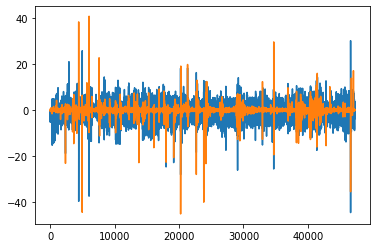

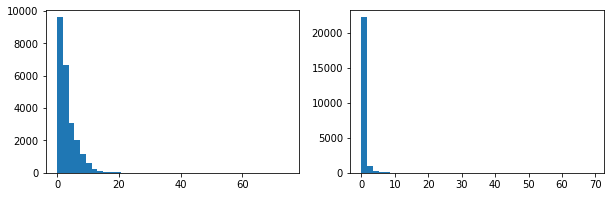

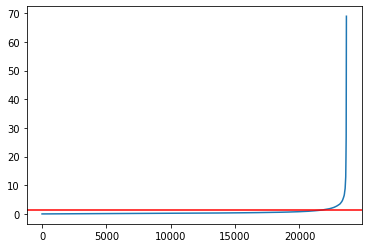

Deleted 1174 observations (4.96%) and 81 tracks (1.12%)

Correspondence matrix saved!
Defining BA input parameters...
C shape: (94, 7146)
C_new shape: (94, 7146)
47 cameras in total, 0 fixed and 47 to be adjusted
3 parameters per camera and 7146 3d points to be optimized
...done!

Shape of matrix A: 44818x21579
`ftol` termination condition is satisfied.
Function evaluations 3, initial cost 1.1429e+05, final cost 1.7165e+03, first-order optimality 1.18e+05.
Optimization took 1 seconds

Error before BA (mean / median): 3.00 / 2.27
Error after  BA (mean / median): 0.36 / 0.25


Bundle adjusted projection matrices successfully saved!

image 0, RMSE calibrated RPC = 2.2253964005581e-05
image 1, RMSE calibrated RPC = 3.30519978117589e-05
image 2, RMSE calibrated RPC = 2.5995559761618697e-05
image 3, RMSE calibrated RPC = 1.8022587635775866e-05
image 4, RMSE calibrated RPC = 2.673241985025093e-05
image 5, RMSE calibrated RPC = 2.359276414926985e-05
image 6, RMSE calibrated RPC = 2.85430196915

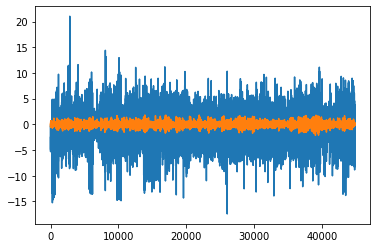

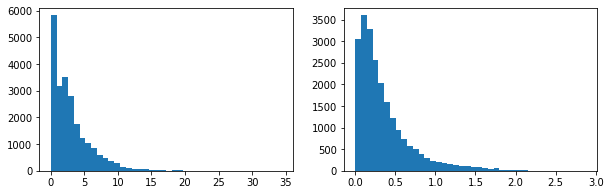

In [5]:
ba_pipeline.run()

### Visualize a feature track before and after

Verify that the projections after Bundle Adjustment are closer to the observations of the feature track.

Displaying feature track with index 6096, length 6

3D location (initial)  : [ 2743070.25959783 -4491219.60315816 -3591448.05294923]
3D location (after BA) : [ 2743071.3816222  -4491220.67250121 -3591448.15955305] 

 ----> Real 2D loc in im 0  (sol) =  [335.12036133  69.51237488]
 ----> Proj 2D loc in im 0  before BA =  [338.48108241  63.46809767]
 ----> Proj 2D loc in im 0  after  BA =  [335.07672615  69.4593811 ]
              Reprojection error beofre BA: 9.40499829216705
              Reprojection error after  BA: 0.09662895812391525


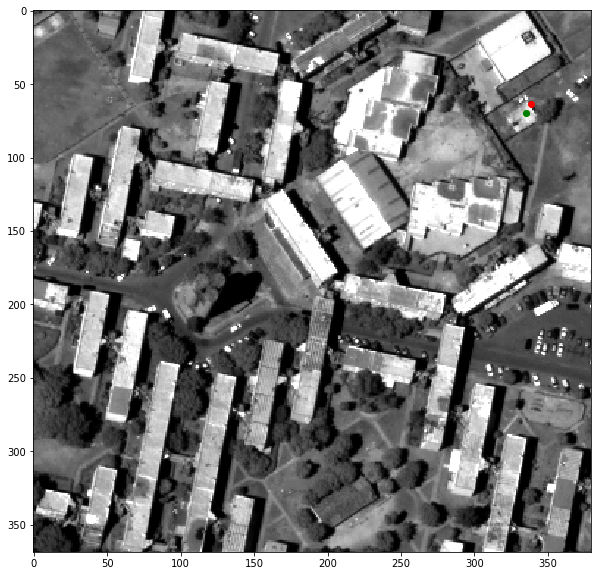

 ----> Real 2D loc in im 1  (sol) =  [ 63.26996994 494.93545532]
 ----> Proj 2D loc in im 1  before BA =  [ 64.59046346 490.37664129]
 ----> Proj 2D loc in im 1  after  BA =  [ 63.51763267 494.92439798]
              Reprojection error beofre BA: 5.879307550322039
              Reprojection error after  BA: 0.25872007789548945


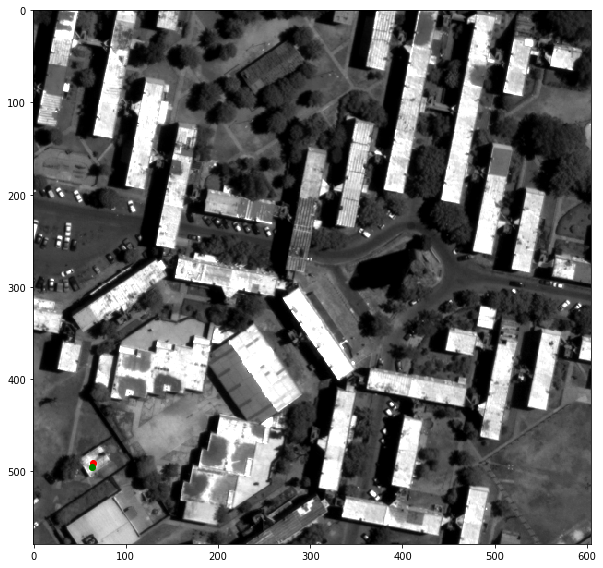

 ----> Real 2D loc in im 2  (sol) =  [540.965271    94.43744659]
 ----> Proj 2D loc in im 2  before BA =  [539.6897029   88.26658014]
 ----> Proj 2D loc in im 2  after  BA =  [541.16974065  94.31225062]
              Reprojection error beofre BA: 7.44643455665053
              Reprojection error after  BA: 0.32966563323529385


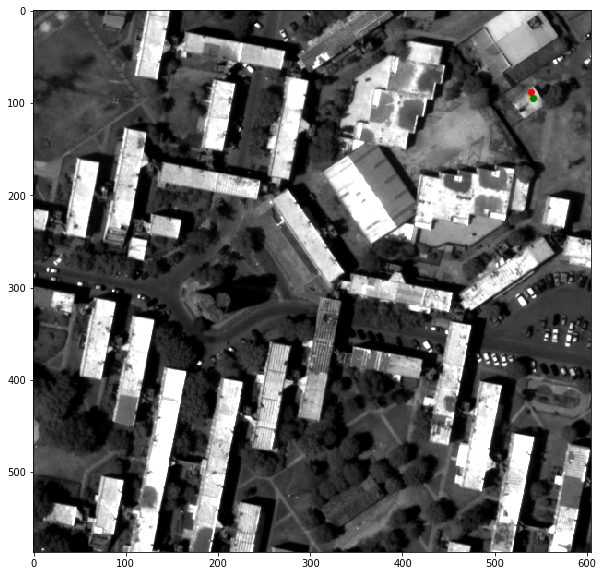

 ----> Real 2D loc in im 6  (sol) =  [474.93475342 112.76493073]
 ----> Proj 2D loc in im 6  before BA =  [476.7277605  112.23583352]
 ----> Proj 2D loc in im 6  after  BA =  [475.04934266 113.13649586]
              Reprojection error beofre BA: 2.3221042903778937
              Reprojection error after  BA: 0.4861543761952021


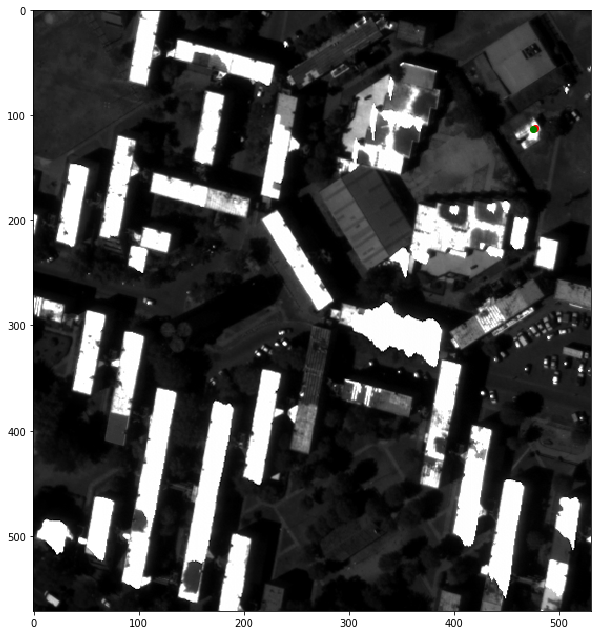

 ----> Real 2D loc in im 9  (sol) =  [522.67541504  86.12666321]
 ----> Proj 2D loc in im 9  before BA =  [522.085881    81.10339447]
 ----> Proj 2D loc in im 9  after  BA =  [523.00666711  85.45813139]
              Reprojection error beofre BA: 5.612802775277331
              Reprojection error after  BA: 0.9997838838502418


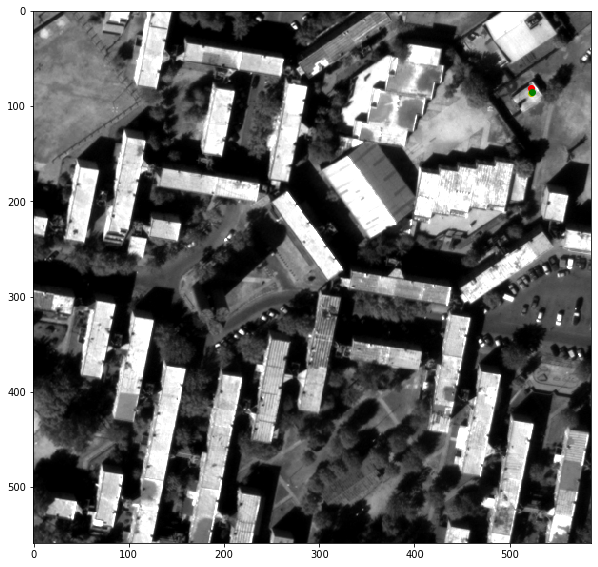

 ----> Real 2D loc in im 40  (sol) =  [500.72454834  85.18634796]
 ----> Proj 2D loc in im 40  before BA =  [501.51831713  86.79011083]
 ----> Proj 2D loc in im 40  after  BA =  [500.30788529  85.62967989]
              Reprojection error beofre BA: 2.397531659277689
              Reprojection error after  BA: 0.8599949729798624


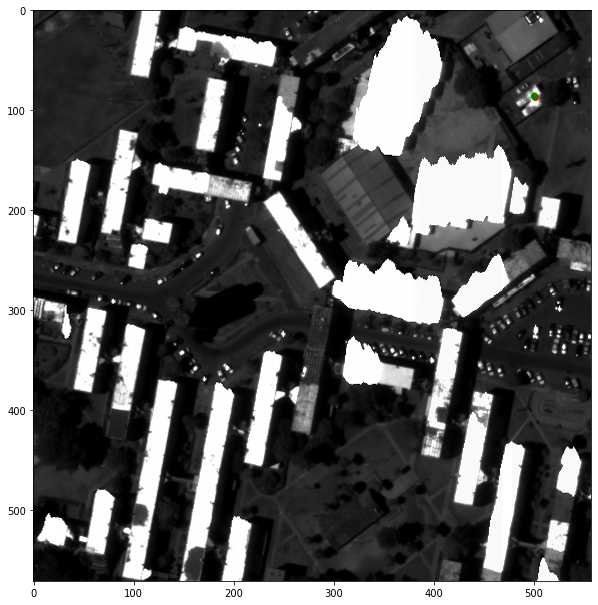

Mean reprojection error before BA: 5.510529854012089
Mean reprojection error after BA: 0.5051579837133341


In [6]:
ba_pipeline.visualize_feature_track(6096)

### Detailed view of initial-final reprojection errors for a particular image

This can be used to analyse a particular image in detail.

image 0, mean abs reproj error before BA: 6.7758
image 0, mean abs reproj error after  BA: 0.4987


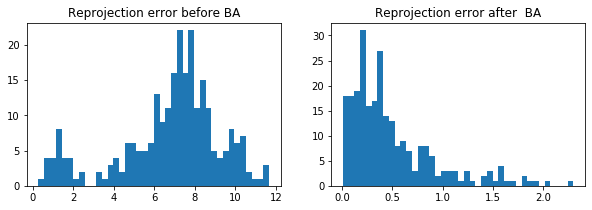

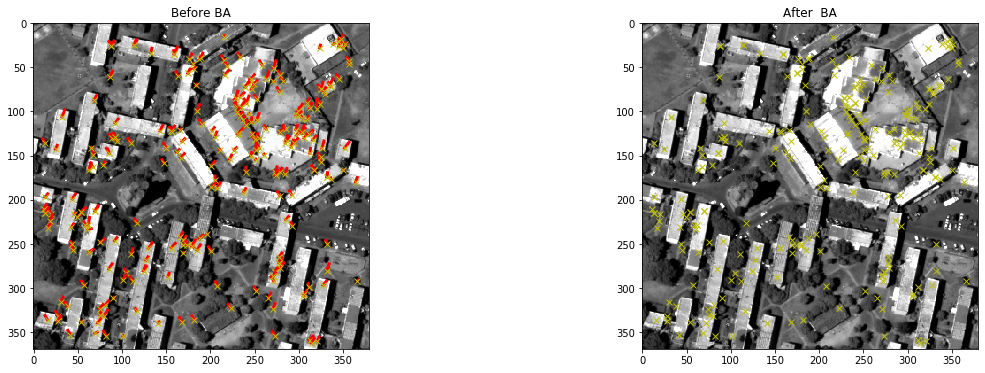

In [7]:
# set the index of the image to analyse
im_idx = 0

ba_pipeline.analyse_reproj_err_particular_image(im_idx, plot_features=True)

### Do the 3D points fall in the correct place?

Verify that the projection of the bounding box containing the point cloud of the scene falls in the correct area of the Earth.

In [8]:
from bundle_adjust.ba_triangulation import project_xyz_bbx_on_map

project_xyz_bbx_on_map(ba_pipeline.pts_3d_ba, map_zoom=17)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

### Check the distance between the projection rays of two cameras

This gives an idea of the error in the traingulation of points before and after Bundle Adjustment.

Checking the distance between projection rays...
...done!



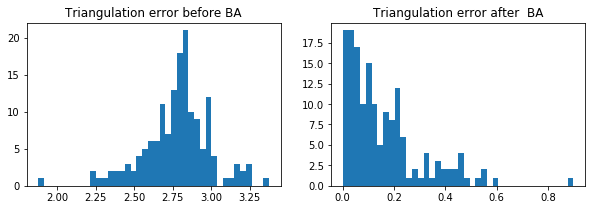

In [9]:
from PIL import Image

if CHECK_TRIANGULATION_DISTANCE and ba_pipeline.cam_model == 'Perspective':

    from bundle_adjust.ba_triangulation import check_distance_between_projection_rays_matches
    
    pair_idx = 0
    
    idx_cam1 = ba_pipeline.pairs_to_triangulate[pair_idx][0]
    idx_cam2 = ba_pipeline.pairs_to_triangulate[pair_idx][1]
    check_distance_between_projection_rays_matches(idx_cam1, idx_cam2, ba_pipeline.C, 
                                                   ba_pipeline.input_P, ba_pipeline.P_crop_ba, 
                                                   plot_err_hist=True, save_err_dsm=False, 
                                                   aoi_lonlat=aoi, output_dir=input_dir)

### Save point clouds of SIFT keypoints before and after Bundle Adjustment 

In [10]:
if SAVE_SIFT_CLOUDS:
    
    from bundle_adjust.ba_triangulation import write_feature_tracks_stereo_point_clouds

    write_feature_tracks_stereo_point_clouds(ba_pipeline.pairs_to_triangulate, ba_pipeline.C, 
                                             ba_pipeline.input_P, ba_pipeline.P_crop_ba, output_dir=input_dir)
    

Writing point clouds of SIFT keypoints...
...done!



### Compute point clouds for all pairs

In [ ]:
if ALL_PIPELINE:
    
    # build point clouds
    from bundle_adjust.ba_triangulation import dense_cloud_from_pair
    
    import warnings
    warnings.filterwarnings('ignore')
    
    list_of_pairs = ba_utils.get_predefined_pairs('pairs/'+site+'_'+order+'.txt', site, order, myimages)
    os.makedirs(input_dir+'/clouds', exist_ok=True)

    print('\nComputing point clouds from stereo pairs...')
    for iter_cont, pair in enumerate(list_of_pairs):
        i, j = pair
        args = [i, j, ba_pipeline.P_crop_ba[i], ba_pipeline.P_crop_ba[j], \
                ba_pipeline.cam_model, ba_pipeline.myimages, ba_pipeline.crop_offsets, aoi]
        xyz =  dense_cloud_from_pair(*args)
        ba_utils.write_point_cloud_ply(input_dir+'/clouds/dense_cloud_{:02}_{:02}.ply'.format(i,j), xyz)
        print('{} / {} done'.format(iter_cont+1, len(list_of_pairs)))
    print('\nDone!\n')


Computing point clouds from stereo pairs...
t=1.6354 done building CV
t=4.1033 done sgmfilter
t=4.2415 done aggregation and WTA refinement
t=1.6578 done building CV
t=4.2355 done sgmfilter
t=4.3715 done aggregation and WTA refinement
1 / 50 done
t=1.7768 done building CV
t=4.3540 done sgmfilter
t=4.4978 done aggregation and WTA refinement
t=1.7274 done building CV
t=4.3007 done sgmfilter
t=4.4432 done aggregation and WTA refinement
2 / 50 done
t=1.7575 done building CV
t=4.3015 done sgmfilter
t=4.4456 done aggregation and WTA refinement
t=1.7193 done building CV
t=4.2472 done sgmfilter
t=4.3900 done aggregation and WTA refinement
3 / 50 done
t=1.7018 done building CV
t=4.2476 done sgmfilter
t=4.3867 done aggregation and WTA refinement
t=1.6957 done building CV
t=4.2672 done sgmfilter
t=4.4060 done aggregation and WTA refinement
4 / 50 done
t=1.5117 done building CV
t=3.9907 done sgmfilter
t=4.1199 done aggregation and WTA refinement
t=1.4790 done building CV
t=3.9679 done sgmfilter
t=